In [1]:
import numpy as np
from tqdm import tqdm

from src.visualization import plot_result
from src.algorithms import LocalSearchTSP, CandidateSteepestLocalSearchTSP

In [2]:
def pretty_print(algorithm, values):
    min_time, max_time, avg_time, minv, maxv, avgv = values
    print(f'Algorithm: {algorithm}:')
    print(f'    objective: {avgv}({int(minv)} - {int(maxv)})')
    print(f'    times: {avg_time}({min_time} - {max_time})')
    print('========================================================')

In [3]:
def experiments(node_path):
    nodes_instance = np.genfromtxt(node_path, dtype=int, delimiter=';')
    algorithms = {'steepest_local_search_edges_random': LocalSearchTSP('steepest', node_path, 'edges', 'random'), 'steepest_local_search_edges_random_candidate': CandidateSteepestLocalSearchTSP(node_path, k=10)}
    results = {}
    for key, algorithm in tqdm(algorithms.items()):
        result = algorithm.run_experiment()
        results[key] = result

    for key, result in results.items():
        values = result[:-2]
        pretty_print(key, values)

    for key, result in results.items():
        minv, path = result[3], result[-2]
        plot_result(nodes_instance, path, minv)
        print('===============================================================')

# Instance C

100%|██████████| 2/2 [09:39<00:00, 289.75s/it]

Algorithm: steepest_local_search_edges_random:
    objective: 51764.39(49279 - 54417)
    times: 2.511184574365616(1.9829535484313965 - 7.901732921600342)
Algorithm: steepest_local_search_edges_random_candidate:
    objective: 74343.895(60187 - 91069)
    times: 0.48028451204299927(0.3363306522369385 - 1.0109314918518066)


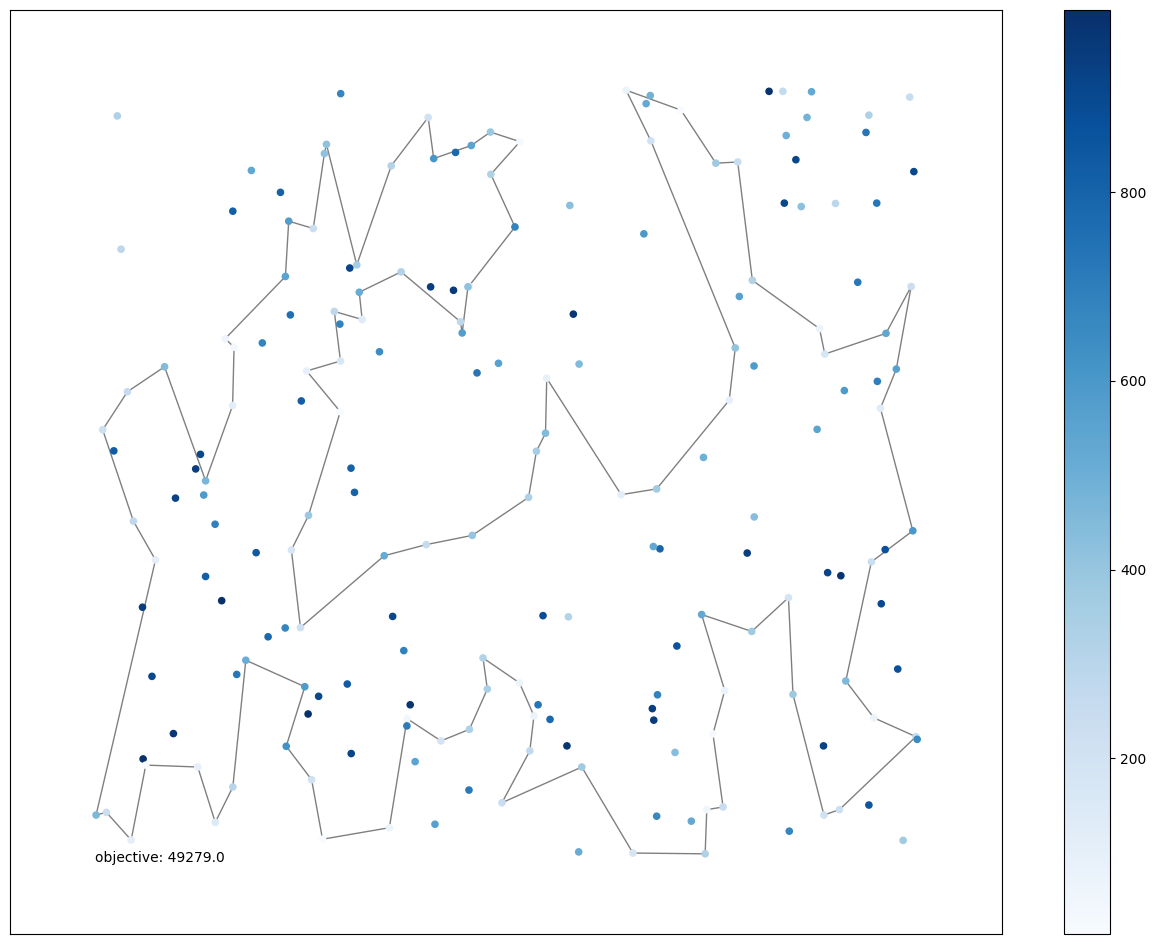

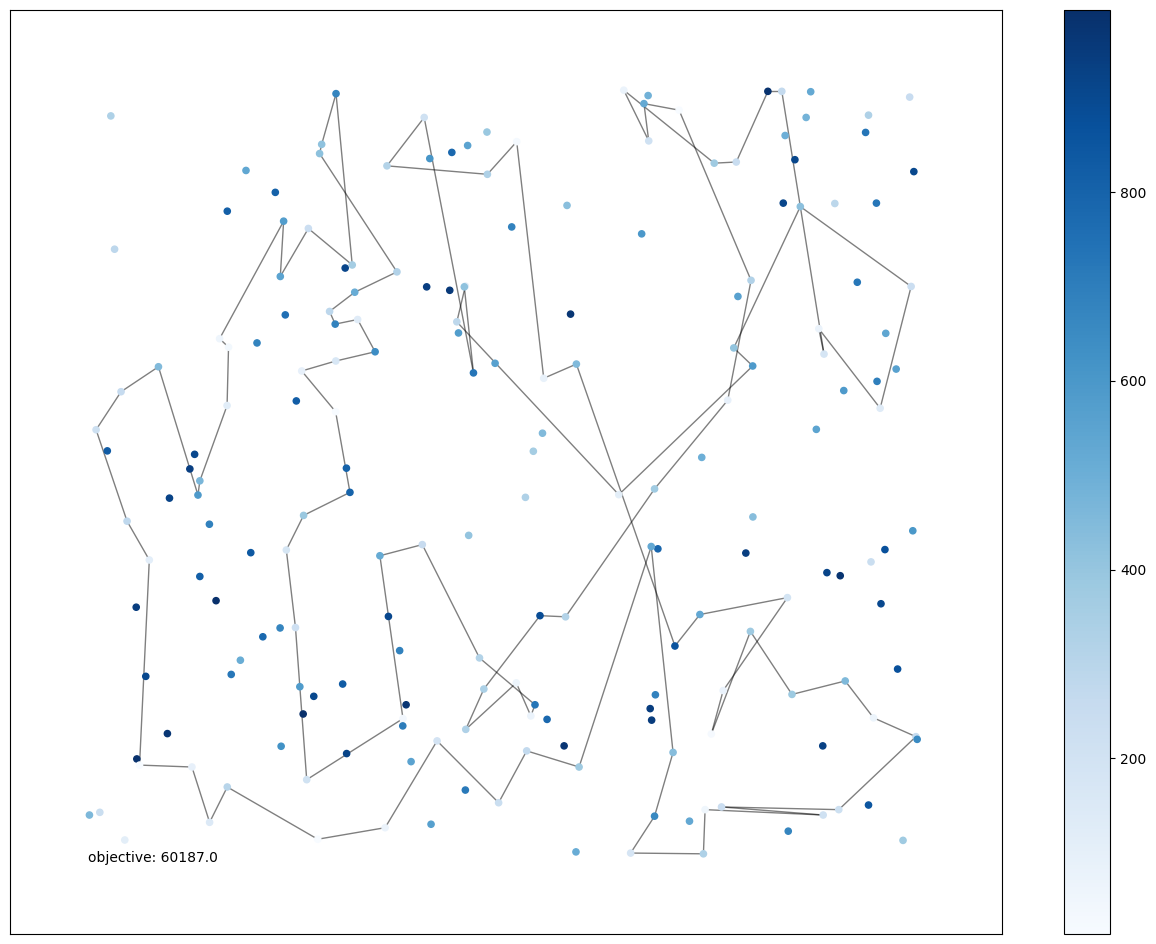

In [4]:
node_path_C = '../data/TSPC.csv'
experiments(node_path_C)

# Instance D

100%|██████████| 2/2 [09:11<00:00, 275.95s/it]

Algorithm: steepest_local_search_edges_random:
    objective: 48583.155(45276 - 52681)
    times: 2.391784862279892(2.0170812606811523 - 3.647094964981079)
Algorithm: steepest_local_search_edges_random_candidate:
    objective: 71693.095(61106 - 86341)
    times: 0.38172790765762327(0.2424464225769043 - 0.5586667060852051)


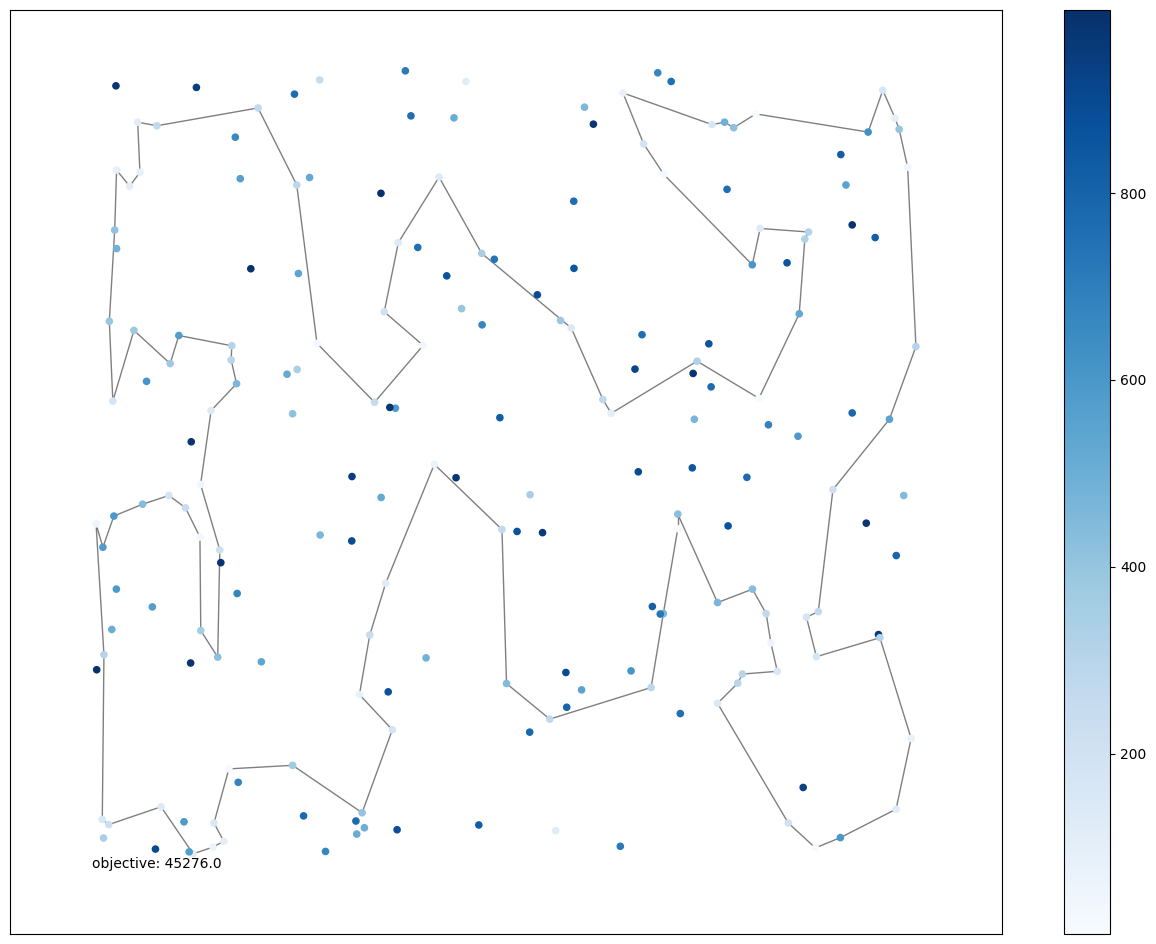

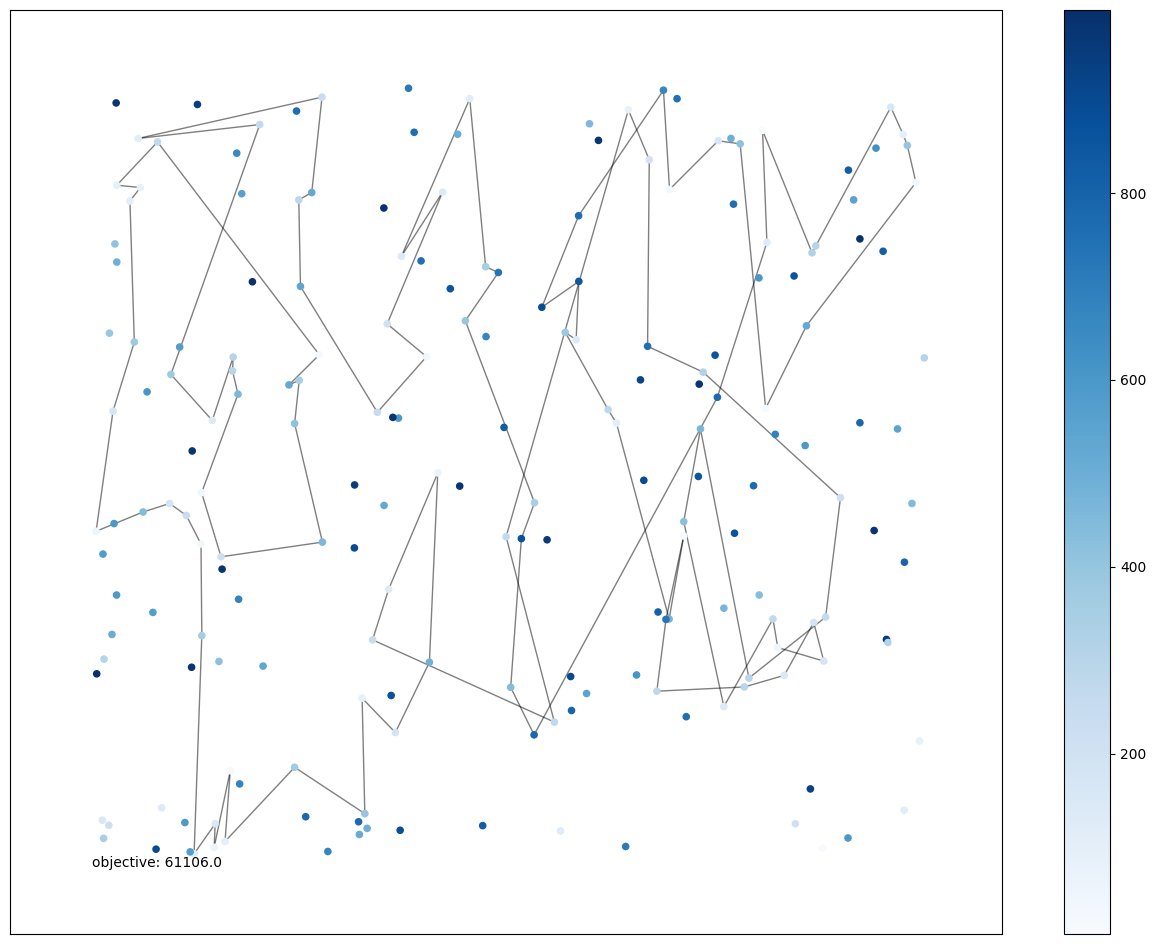

In [5]:
node_path_D = '../data/TSPD.csv'
experiments(node_path_D)